In [ ]:
import matplotlib.pyplot
import numpy
import random
import networkx as nx

### Binning real numbers

In [ ]:
mu = 2
sygma = .125
rdm = list()
for i in range (0, 5000):
    rdm.append(random.gauss(mu, sygma))

In [ ]:
print(len(rdm))

In [ ]:
binnedData = numpy.histogram(rdm, bins=10)
print(binnedData)

Function numpy.histogram() returns two arrays of different length. Representing the X and Y axis, respectively. 

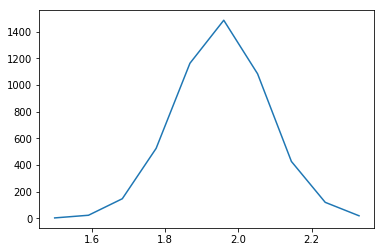

In [5]:
binnedDataY = binnedData[0]
binnedDataX = binnedData[1][0:10]
matplotlib.pyplot.plot(binnedDataX, binnedDataY)

To deal with the mismatching lenghts, I removed one of the values in the X axis, thus it had no Y value, which is more worthy.

### Binning integers

In [6]:
lam = 10
poisson = list()
for i in range (0, 5000):
    poisson.append(numpy.random.poisson(lam))
sorted(poisson)

[1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [7]:
len(poisson)

5000

In [8]:
min(poisson)

1

In [9]:
max(poisson)

24

In [10]:
for i in poisson:
    if i > 23:
        print('bigger hehe...')
    if i < 1:
        print('smaller hehe...')

bigger hehe...


In [11]:
v = list()
for p in sorted(poisson):
    if len(v) < 1:
        v.append(p)
    if p != v[len(v)-1]:
        v.append(p)

In [12]:
print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [13]:
numpy.histogram(poisson,bins=v)

(array([  5,   6,  38, 110, 187, 326, 433, 521, 650, 628, 581, 488, 375,
        245, 175,  86,  66,  35,  27,   7,   6,   3,   2]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]))

<BarContainer object of 23 artists>

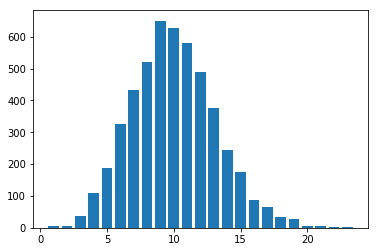

In [14]:
poissonX = numpy.histogram(poisson, v)[1][0:len(numpy.histogram(poisson, v)[0])]
poissonY = numpy.histogram(poisson, v)[0]
matplotlib.pyplot.bar(poissonX, poissonY)

The sum over bin counts is the same as different integers the random function has created.

### Binning and plotting degree distributions

- Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that $N=5000$, but how do you find $p$? Hint: The parameter $λ$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k=10$. And you know that $⟨k⟩=p(N−1)$, which will give you $p$.

Note that Python by default returns the result of divisions as the most precise of the datatypes involved (for instance, try computing 1/2 and 1.0/2.0 in your notebook). If you want division to always give you a decimal number, you can enter 'from _ _ future _ _ import division' at the beginning of your notebook.


In [15]:
N = 5000
k = 10
p = k/(N-1)

In [16]:
p

0.002000400080016003

- Now, use networkx to create the graph and extract the degree distribution.

In [70]:
ER = nx.erdos_renyi_graph(N, p)

In [85]:
# earlier in the program, NOT inside the loop
Dup = {}
v = list()
for n, d in ER.degree:
    # inside your loop to add items:
    if d in Dup:
        ItemNumber = Dup[d]
    else:
        v.append(d)
        Dup[d] = ItemNumber = len(v)-1
print(sorted(v))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [105]:
binnedERDeg = numpy.histogram(ER.degree,bins=sorted(v))
ERx = binnedERDeg[0]
ERy = binnedERDeg[1][0:len(binnedERDeg[0])]

- Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

<BarContainer object of 22 artists>

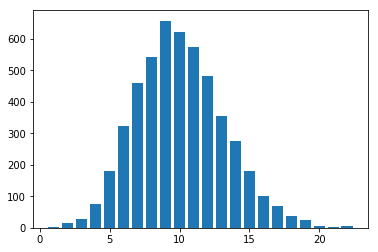

In [106]:
matplotlib.pyplot.bar(ERy, ERx)